In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [34]:
#load data
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.boston_housing.load_data(

    path="boston_housing_npz",
    test_split=0.2,
    seed=42
)

In [35]:
(X_train.shape,type(X_train)),(y_train.shape,type(y_train)),(X_test.shape,type(X_test)) , (y_test.shape,type(y_test))

(((404, 13), numpy.ndarray),
 ((404,), numpy.ndarray),
 ((102, 13), numpy.ndarray),
 ((102,), numpy.ndarray))

In [36]:
#converting data into dataframe
X_train_df=pd.DataFrame(X_train)
y_train_df=pd.DataFrame(y_train)

In [38]:
#view first 5 datasets
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [39]:
#view summary of datasets
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [40]:
#distribution of numerical sample across data samples
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [41]:
#preprocessing
ct= make_column_transformer(
    (MinMaxScaler(), [0,1,2,3,4,5,6,7,8,9,10,11,12])   #scales each feature between 0 to 1 range
)

#normalization and changing the data type (of input of the model)
X_train_df= ct.fit_transform(X_train).astype('float32')
X_test_df=ct.transform(X_test).astype('float32')


y_train_df= y_train.astype('float32')
y_test_df=y_test.astype('float32')

In [42]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [43]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((363, 13), (41, 13), (363,), (41,))

In [44]:
# ensures that the same sequence of random numbers is generated every time the
tf.random.set_seed(42)

In [48]:
# building the neural network model

model =tf.keras.Sequential([
      tf.keras.layers.Dense(units=10, activation='relu',input_shape=(X_train.shape[1],),name="input_layer"),  #layer 1 = input layer
      tf.keras.layers.Dense(units=100, activation='relu',name="hidden_layer"),    #layer 2= hidden layer
      tf.keras.layers.Dense(units=1,name="output_layer")      #layer 3 = prediction/output layer
])


In [49]:
#compiling the model
model.compile(
        loss= tf.keras.losses.mean_squared_error,     #loss function
        optimizer =tf.keras.optimizers.RMSprop(learning_rate=0.01),  #optimiser adjusts weights of NN based on loss function
        metrics =['mse']    #performance evaluation metric
)

In [50]:
#training the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val,y_val)
)

Epoch 1/50
12/12 [==============================] - 1s 22ms/step - loss: 803.5817 - mse: 803.5817 - val_loss: 152.5785 - val_mse: 152.5785
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 167.5599 - mse: 167.5599 - val_loss: 353.8368 - val_mse: 353.8368
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 125.6106 - mse: 125.6106 - val_loss: 176.6607 - val_mse: 176.6607
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 95.3056 - mse: 95.3056 - val_loss: 124.1298 - val_mse: 124.1298
Epoch 5/50
12/12 [==============================] - 0s 9ms/step - loss: 150.1521 - mse: 150.1521 - val_loss: 207.1622 - val_mse: 207.1622
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 79.7317 - mse: 79.7317 - val_loss: 91.4188 - val_mse: 91.4188
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 110.2155 - mse: 110.2155 - val_loss: 72.0716 - val_mse: 72.0716
Epoch 8/50
12/12 [=======================

In [51]:
#model evaluation
X_train.mean() , y_val.mean()

(70.17155675778766, 24.897560975609753)

In [52]:
#evaluate the model on test data

print("evaluation  of test data")
loss,mse=model.evaluate(X_test,y_test,batch_size=32)
print(f" Model loss on test set :{loss}")
print(f" model mean square error on test data set: {mse}")



evaluation  of test data
4/4 [==============================] - 0s 5ms/step - loss: 40.4233 - mse: 40.4233
 Model loss on test set :40.42326736450195
 model mean square error on test data set: 40.42326736450195


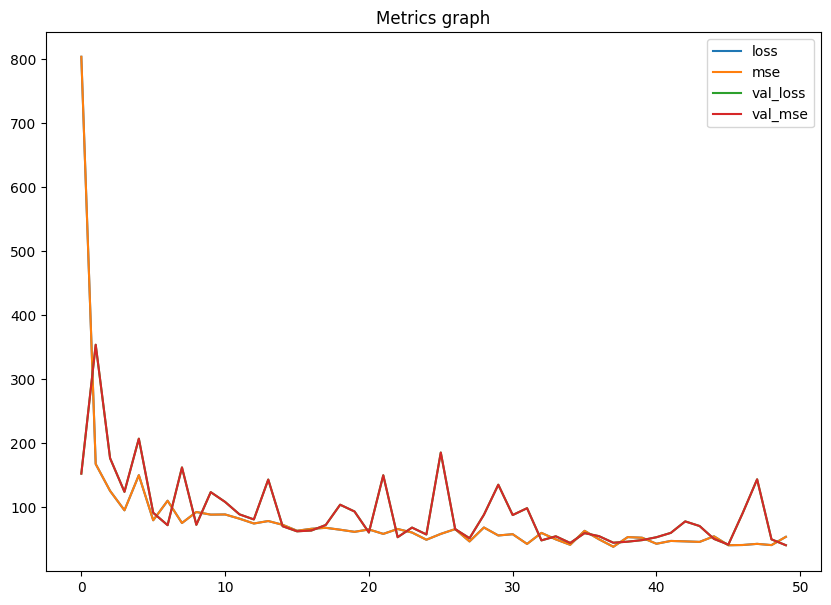

In [53]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [54]:
# pd.DataFrame(history.history)

,loss,mse,val_loss,val_mse
0,803.581726,803.581726,152.578537,152.578537
1,167.559891,167.559891,353.836761,353.836761
2,125.610603,125.610603,176.660675,176.660675
3,95.305634,95.305634,124.129814,124.129814
4,150.152100,150.152100,207.162155,207.162155
5,79.731705,79.731705,91.418770,91.418770
6,110.215492,110.215492,72.071587,72.071587
7,75.440956,75.440956,162.249084,162.249084
8,92.614594,92.614594,72.659111,72.659111
9,88.542229,88.542229,123.661858,123.661858


In [55]:
#make prediction
y_pred = model.predict(X_test)

y_pred[0]

4/4 [==============================] - 0s 5ms/step


array([22.602869], dtype=float32)

In [59]:
# y_pred

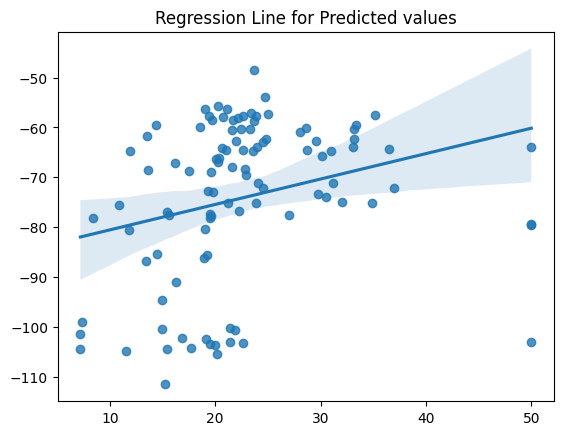

In [28]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [57]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")


In [58]:
regression_metrics_display(y_test, y_pred)

MAE is 4.731422082115622
MSE is 40.423266834167435
R2 score is 0.4322735291584545
